# Sidecar Product Analytics

The objective of this 1,539 row dataset is to find some interesting insights related to
Google Shopping Advertisements

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics

%matplotlib inline

In [24]:
Sidecar = pd.read_csv('sidecar_product_analyst_challenge_data.csv')

Sidecar

,site_id,date,site_orders,site_views,site_units,site_revenue,impressions,clicks,channel_orders,cost,channel_revenue,channel_aov,cr,site_aov,cos
0,1,2/28/17,10,2278,11,4758.499981,102179,1753,8,776.969998,5187.350079,648.418760,0.004564,475.849998,0.149782
1,2,3/4/17,16,743,50,1356.620010,29236,180,4,80.790000,224.810000,56.202500,0.022222,84.788751,0.359370
2,3,3/10/17,127,2584,1107,7386.249978,120537,1505,88,199.600001,3128.700027,35.553409,0.058472,58.159449,0.063796
3,3,3/8/17,132,2707,882,4803.110009,124084,1576,83,208.850000,2735.950009,32.963253,0.052665,36.387197,0.076335
4,4,3/4/17,1608,238781,10816,128579.148800,178064,2364,79,1170.800000,4875.279998,61.712405,0.033418,79.962157,0.240150
5,5,2/27/17,85,8704,521,3639.389992,159358,1628,40,258.670000,1497.070004,37.426750,0.024570,42.816353,0.172784
6,6,2/27/17,1869,201941,6201,160554.071000,223905,2221,80,1197.989991,4109.589970,51.369875,0.036020,85.903730,0.291511
7,7,2/28/17,6,304,9,710.990002,11432,68,2,54.990000,110.610001,55.305000,0.029412,118.498334,0.497152
8,8,3/15/17,1865,24569,4654,58539.499760,92430,2268,89,354.970002,6261.470021,70.353596,0.039242,31.388472,0.056691
9,9,3/8/17,260,24771,1081,77492.051030,326314,4976,83,1158.299999,18137.699950,218.526505,0.016680,298.046350,0.063861


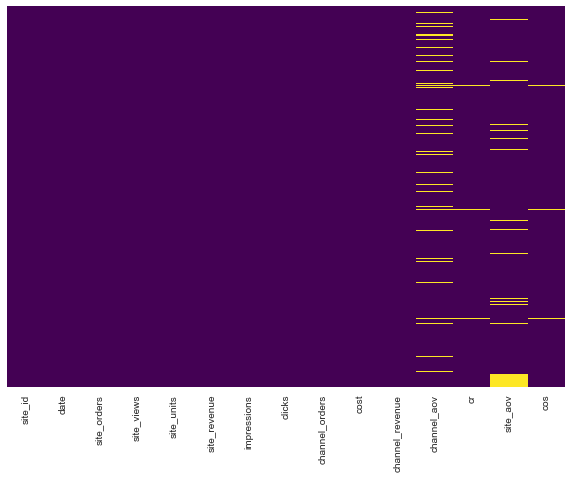

In [25]:
# Create a heatmap, to check for null values. 
#(we only care about doing something with the null values to the extent
# that we use them in the analysis. The yellow rows represent null values)

plt.figure(figsize=(10,7))
sns.heatmap(Sidecar.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [26]:
# Check how many unique websites there are in the dataset.

Sidecar['site_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55])

In [27]:
# All numeric features are here grouped by site_id and summed by all
# grouped values except date and those represented as ratios (such as conversion ratio, etc) as
# we will compute some of these features after grouping. Otherwise they would not represent
# sensible values for some of the calculations/graphs below.

group_by_site_id = Sidecar.groupby('site_id').agg({'site_orders':sum, 'site_views': sum,'site_units':sum,'site_revenue':sum,'impressions':sum, 'clicks':sum,'channel_orders':sum,\
                                                   'clicks':sum, 'channel_orders':sum, 'cost':sum, 'channel_revenue': sum, 'channel_aov':sum, \
                                                  'cr':sum, 'site_aov':sum, 'cos':sum})

group_by_site_id.head(5)

,site_aov,site_views,cost,impressions,cr,cos,channel_revenue,site_units,site_orders,site_revenue,channel_aov,channel_orders,clicks
site_id,,,,,,,,,,,,,
1,18382.148346,81598,19072.759990,3218050,0.154186,3.409212,214886.029766,639,507,3.544569e+05,19586.659609,301,54298
2,4078.049504,33227,2819.259998,877255,0.698881,inf,17205.499921,4509,754,1.236714e+05,2406.443441,176,6874
3,1201.894436,63399,4715.420007,2772611,1.690078,1.897766,71882.459988,21777,3012,1.333258e+05,961.940012,2093,35635
4,2222.055519,6486101,37173.110026,5357096,0.781348,10.543189,104618.319934,288521,41824,3.469204e+06,1424.664985,2048,74624
5,1166.445061,222072,5248.589996,3738916,0.638018,5.435364,31278.940002,11191,1834,7.952574e+04,999.539606,875,38759


Here, new features are created that are potentially interesting to investigate. Only some of 
them will appear in more detailed analysis, depending on how interesting they are and what
correlations they have with other features.

In [28]:
# This calculates the percent of orders made for every ad shown.

group_by_site_id['Percent_of_orders_made_per_ads_shown'] = group_by_site_id['channel_orders']/group_by_site_id['impressions']


# This calculates the Conversion Rate by Site ID (the original conversion rate would not
# make logical sense when grouping by site_id)

group_by_site_id['Conversion_Rate_by_site_id'] = group_by_site_id['channel_orders']/group_by_site_id['clicks']

# Conversion Rate Per Unit 

group_by_site_id['Conversion_Rate_Per_Unit'] = group_by_site_id['Conversion_Rate_by_site_id']/group_by_site_id['site_units']

# This calculates the Clicks/Impressions ratio

group_by_site_id['Clicks_to_Impressions_Ratio'] = group_by_site_id['clicks']/group_by_site_id['impressions']

# This calculates the Clicks/Impressions ratio per Unit

group_by_site_id['Clicks_to_Impressions_Ratio_Per_Unit'] = group_by_site_id['Clicks_to_Impressions_Ratio']/group_by_site_id['site_units']

# This calculates the Profit 

group_by_site_id['Channel_Profit'] = (group_by_site_id['channel_revenue']-group_by_site_id['cost'])


# This calculates the Profit Per Site Unit

group_by_site_id['Channel_Profit_Per_Site_Unit'] = (group_by_site_id['channel_revenue']-group_by_site_id['cost'])/group_by_site_id['site_units']


# This calculates the Price per site unit

group_by_site_id['Price_Per_Unit'] = group_by_site_id['channel_revenue']/group_by_site_id['site_units']


# This calculates the Impressions per site unit

group_by_site_id['Impressions_Per_Unit'] = group_by_site_id['impressions']/group_by_site_id['site_units']


# This calculates the Clicks per site unit

group_by_site_id['Clicks_Per_Unit'] = group_by_site_id['clicks']/group_by_site_id['site_units']


# This calculates the Channel Orders per site unit

group_by_site_id['Channel_Orders_Per_Unit'] = group_by_site_id['channel_orders']/group_by_site_id['site_units']


# This calculates the Cost per site unit

group_by_site_id['Cost_Per_Unit'] = group_by_site_id['cost']/group_by_site_id['site_units']

group_by_site_id.head(5)

,site_aov,site_views,cost,impressions,cr,cos,channel_revenue,site_units,site_orders,site_revenue,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
site_id,,,,,,,,,,,,,,,,,,,,,
1,18382.148346,81598,19072.759990,3218050,0.154186,3.409212,214886.029766,639,507,3.544569e+05,...,8.675246e-06,0.016873,2.640524e-05,195813.269776,306.437042,336.284867,5036.071987,84.973396,0.471049,29.847825
2,4078.049504,33227,2819.259998,877255,0.698881,inf,17205.499921,4509,754,1.236714e+05,...,5.678360e-06,0.007836,1.737815e-06,14386.239923,3.190561,3.815813,194.556443,1.524507,0.039033,0.625252
3,1201.894436,63399,4715.420007,2772611,1.690078,1.897766,71882.459988,21777,3012,1.333258e+05,...,2.697084e-06,0.012853,5.901872e-07,67167.039981,3.084311,3.300843,127.318317,1.636359,0.096111,0.216532
4,2222.055519,6486101,37173.110026,5357096,0.781348,10.543189,104618.319934,288521,41824,3.469204e+06,...,9.512047e-08,0.013930,4.828049e-08,67445.209908,0.233762,0.362602,18.567439,0.258643,0.007098,0.128840
5,1166.445061,222072,5248.589996,3738916,0.638018,5.435364,31278.940002,11191,1834,7.952574e+04,...,2.017282e-06,0.010366,9.263134e-07,26030.350006,2.326008,2.795008,334.100259,3.463408,0.078188,0.469001


In [29]:
del group_by_site_id['channel_aov']
del group_by_site_id['site_aov']
del group_by_site_id['cr']
del group_by_site_id['cos']

group_by_site_id.head(5)

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
site_id,,,,,,,,,,,,,,,,,,,,,
1,81598,19072.759990,3218050,214886.029766,639,507,3.544569e+05,301,54298,0.000094,...,8.675246e-06,0.016873,2.640524e-05,195813.269776,306.437042,336.284867,5036.071987,84.973396,0.471049,29.847825
2,33227,2819.259998,877255,17205.499921,4509,754,1.236714e+05,176,6874,0.000201,...,5.678360e-06,0.007836,1.737815e-06,14386.239923,3.190561,3.815813,194.556443,1.524507,0.039033,0.625252
3,63399,4715.420007,2772611,71882.459988,21777,3012,1.333258e+05,2093,35635,0.000755,...,2.697084e-06,0.012853,5.901872e-07,67167.039981,3.084311,3.300843,127.318317,1.636359,0.096111,0.216532
4,6486101,37173.110026,5357096,104618.319934,288521,41824,3.469204e+06,2048,74624,0.000382,...,9.512047e-08,0.013930,4.828049e-08,67445.209908,0.233762,0.362602,18.567439,0.258643,0.007098,0.128840
5,222072,5248.589996,3738916,31278.940002,11191,1834,7.952574e+04,875,38759,0.000234,...,2.017282e-06,0.010366,9.263134e-07,26030.350006,2.326008,2.795008,334.100259,3.463408,0.078188,0.469001


In [30]:
# We need to remove 1 row that contains inf for preprocessing and other calculations
# We reset the index.

group_by_site_id = group_by_site_id.add_suffix('').reset_index()

group_by_site_id

,site_id,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
0,1,81598,19072.759990,3218050,214886.029766,639,507,3.544569e+05,301,54298,...,8.675246e-06,0.016873,2.640524e-05,195813.269776,306.437042,336.284867,5.036072e+03,84.973396,0.471049,29.847825
1,2,33227,2819.259998,877255,17205.499921,4509,754,1.236714e+05,176,6874,...,5.678360e-06,0.007836,1.737815e-06,14386.239923,3.190561,3.815813,1.945564e+02,1.524507,0.039033,0.625252
2,3,63399,4715.420007,2772611,71882.459988,21777,3012,1.333258e+05,2093,35635,...,2.697084e-06,0.012853,5.901872e-07,67167.039981,3.084311,3.300843,1.273183e+02,1.636359,0.096111,0.216532
3,4,6486101,37173.110026,5357096,104618.319934,288521,41824,3.469204e+06,2048,74624,...,9.512047e-08,0.013930,4.828049e-08,67445.209908,0.233762,0.362602,1.856744e+01,0.258643,0.007098,0.128840
4,5,222072,5248.589996,3738916,31278.940002,11191,1834,7.952574e+04,875,38759,...,2.017282e-06,0.010366,9.263134e-07,26030.350006,2.326008,2.795008,3.341003e+02,3.463408,0.078188,0.469001
5,6,6783215,20821.560005,4058933,90043.230022,291534,69915,5.914768e+06,1876,45919,...,1.401365e-07,0.011313,3.880533e-08,69221.670016,0.237439,0.308860,1.392267e+01,0.157508,0.006435,0.071421
6,7,9234,657.880002,163051,1421.950008,148,58,7.621840e+03,15,1195,...,8.481285e-05,0.007329,4.952024e-05,764.070006,5.162635,9.607770,1.101696e+03,8.074324,0.101351,4.445135
7,8,396830,5511.110008,1966271,89228.230095,50450,26092,9.031701e+05,1672,37041,...,8.947308e-07,0.018838,3.734033e-07,83717.120087,1.659408,1.768647,3.897465e+01,0.734212,0.033142,0.109239
8,9,715049,40215.290014,10468484,549428.239197,23967,7247,1.797564e+06,2839,166313,...,7.122386e-07,0.015887,6.628706e-07,509212.949183,21.246420,22.924364,4.367874e+02,6.939250,0.118455,1.677944
9,10,180194,22417.169987,1777961,109269.350294,40294,5095,1.572996e+06,631,22928,...,6.830033e-07,0.012896,3.200395e-07,86852.180306,2.155462,2.711802,4.412471e+01,0.569018,0.015660,0.556340


In [31]:
# Resetting index to site_id

group_by_site_id = group_by_site_id.set_index('site_id')

group_by_site_id.head(5)

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
site_id,,,,,,,,,,,,,,,,,,,,,
1,81598,19072.759990,3218050,214886.029766,639,507,3.544569e+05,301,54298,0.000094,...,8.675246e-06,0.016873,2.640524e-05,195813.269776,306.437042,336.284867,5036.071987,84.973396,0.471049,29.847825
2,33227,2819.259998,877255,17205.499921,4509,754,1.236714e+05,176,6874,0.000201,...,5.678360e-06,0.007836,1.737815e-06,14386.239923,3.190561,3.815813,194.556443,1.524507,0.039033,0.625252
3,63399,4715.420007,2772611,71882.459988,21777,3012,1.333258e+05,2093,35635,0.000755,...,2.697084e-06,0.012853,5.901872e-07,67167.039981,3.084311,3.300843,127.318317,1.636359,0.096111,0.216532
4,6486101,37173.110026,5357096,104618.319934,288521,41824,3.469204e+06,2048,74624,0.000382,...,9.512047e-08,0.013930,4.828049e-08,67445.209908,0.233762,0.362602,18.567439,0.258643,0.007098,0.128840
5,222072,5248.589996,3738916,31278.940002,11191,1834,7.952574e+04,875,38759,0.000234,...,2.017282e-06,0.010366,9.263134e-07,26030.350006,2.326008,2.795008,334.100259,3.463408,0.078188,0.469001


In [32]:
# Drop the row that had "inf" in its row (row 28)

group_by_site_updated = group_by_site_id.drop(28)

In [33]:
# Check that the row was dropped

group_by_site_updated

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
site_id,,,,,,,,,,,,,,,,,,,,,
1,81598,19072.759990,3218050,214886.029766,639,507,3.544569e+05,301,54298,0.000094,...,8.675246e-06,0.016873,2.640524e-05,195813.269776,306.437042,336.284867,5036.071987,84.973396,0.471049,29.847825
2,33227,2819.259998,877255,17205.499921,4509,754,1.236714e+05,176,6874,0.000201,...,5.678360e-06,0.007836,1.737815e-06,14386.239923,3.190561,3.815813,194.556443,1.524507,0.039033,0.625252
3,63399,4715.420007,2772611,71882.459988,21777,3012,1.333258e+05,2093,35635,0.000755,...,2.697084e-06,0.012853,5.901872e-07,67167.039981,3.084311,3.300843,127.318317,1.636359,0.096111,0.216532
4,6486101,37173.110026,5357096,104618.319934,288521,41824,3.469204e+06,2048,74624,0.000382,...,9.512047e-08,0.013930,4.828049e-08,67445.209908,0.233762,0.362602,18.567439,0.258643,0.007098,0.128840
5,222072,5248.589996,3738916,31278.940002,11191,1834,7.952574e+04,875,38759,0.000234,...,2.017282e-06,0.010366,9.263134e-07,26030.350006,2.326008,2.795008,334.100259,3.463408,0.078188,0.469001
6,6783215,20821.560005,4058933,90043.230022,291534,69915,5.914768e+06,1876,45919,0.000462,...,1.401365e-07,0.011313,3.880533e-08,69221.670016,0.237439,0.308860,13.922675,0.157508,0.006435,0.071421
7,9234,657.880002,163051,1421.950008,148,58,7.621840e+03,15,1195,0.000092,...,8.481285e-05,0.007329,4.952024e-05,764.070006,5.162635,9.607770,1101.695946,8.074324,0.101351,4.445135
8,396830,5511.110008,1966271,89228.230095,50450,26092,9.031701e+05,1672,37041,0.000850,...,8.947308e-07,0.018838,3.734033e-07,83717.120087,1.659408,1.768647,38.974648,0.734212,0.033142,0.109239
9,715049,40215.290014,10468484,549428.239197,23967,7247,1.797564e+06,2839,166313,0.000271,...,7.122386e-07,0.015887,6.628706e-07,509212.949183,21.246420,22.924364,436.787416,6.939250,0.118455,1.677944


Let's check what the distributions of some of the variables are to see if there are any potential outliers and what we can do with them.

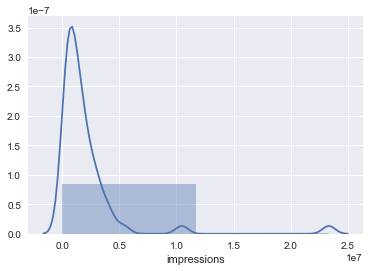

In [34]:
# This shows a right skew distribution with a tail at the end that has some outliers. We won't
# remove the outliers but analyze them in the rest of the analysis.

f,ax1 = plt.subplots(1,1)
sns.distplot(group_by_site_updated['impressions'],bins=2,norm_hist=False)
plt.show()

In [44]:
# We can see that there are roughly 6% (3) outliers that have over 5,000,000 impressions. We 
# won't remove them from the dataset because there is no obvious business reason for why they
# have to be incorrect but we will make note of them in further investigations of impressions
# or not include them in our graph representations.

group_by_site_updated[(group_by_site_updated['impressions']>5000000)].count()

site_views                              3
cost                                    3
impressions                             3
channel_revenue                         3
site_units                              3
site_orders                             3
site_revenue                            3
channel_orders                          3
clicks                                  3
Percent_of_orders_made_per_ads_shown    3
Conversion_Rate_by_site_id              3
Conversion_Rate_Per_Unit                3
Clicks_to_Impressions_Ratio             3
Clicks_to_Impressions_Ratio_Per_Unit    3
Channel_Profit                          3
Channel_Profit_Per_Site_Unit            3
Price_Per_Unit                          3
Impressions_Per_Unit                    3
Clicks_Per_Unit                         3
Channel_Orders_Per_Unit                 3
Cost_Per_Unit                           3
dtype: int64

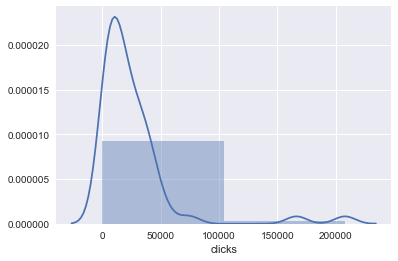

In [36]:
# This shows a right skew distribution with tail at the end that has some outliers

f,ax1 = plt.subplots(1,1)
sns.distplot(group_by_site_updated['clicks'],bins=2,norm_hist=False)
plt.show()

In [37]:
# This shows a right skew distribution for clicks with a tail which is very similar to 
# the impressions distribution above. Roughly 4% of points fall above 100,000. We won't remove
# them from the dataset because there is no obvious business reason for why they have to be
# incorrect but we will make note of them in further investigations of impressions or not 
# include them in our graphs.

group_by_site_updated[(group_by_site_updated['clicks']>100000)].count()



site_views                              2
cost                                    2
impressions                             2
channel_revenue                         2
site_units                              2
site_orders                             2
site_revenue                            2
channel_orders                          2
clicks                                  2
Percent_of_orders_made_per_ads_shown    2
Conversion_Rate_by_site_id              2
Conversion_Rate_Per_Unit                2
Clicks_to_Impressions_Ratio             2
Clicks_to_Impressions_Ratio_Per_Unit    2
Channel_Profit                          2
Channel_Profit_Per_Site_Unit            2
Price_Per_Unit                          2
Impressions_Per_Unit                    2
Clicks_Per_Unit                         2
Channel_Orders_Per_Unit                 2
Cost_Per_Unit                           2
dtype: int64

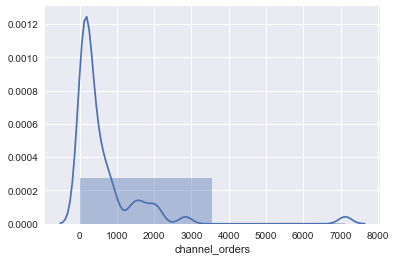

In [38]:
# This shows a right skew distribution with tail at the end that has some outliers

f,ax1 = plt.subplots(1,1)
sns.distplot(group_by_site_updated['channel_orders'],bins=2,norm_hist=False)
plt.show()

In [45]:
# As can be seen, only a 2% of values fall above 3,000 channel orders. We will approach those
# the same way as the outliers above

group_by_site_updated[(group_by_site_updated['channel_orders']>3000)].count()

site_views                              1
cost                                    1
impressions                             1
channel_revenue                         1
site_units                              1
site_orders                             1
site_revenue                            1
channel_orders                          1
clicks                                  1
Percent_of_orders_made_per_ads_shown    1
Conversion_Rate_by_site_id              1
Conversion_Rate_Per_Unit                1
Clicks_to_Impressions_Ratio             1
Clicks_to_Impressions_Ratio_Per_Unit    1
Channel_Profit                          1
Channel_Profit_Per_Site_Unit            1
Price_Per_Unit                          1
Impressions_Per_Unit                    1
Clicks_Per_Unit                         1
Channel_Orders_Per_Unit                 1
Cost_Per_Unit                           1
dtype: int64

In [19]:
# Normalize the dataset using the MinMax Scaler (which converts all numeric values to a 
# scale of 0 to 1). This is done in order to make all features on the same scale.


from sklearn.preprocessing import MinMaxScaler
Sidecar_Scaled = MinMaxScaler().fit_transform(group_by_site_updated.astype(float))
Sidecar_Preprocessed = pd.DataFrame(Sidecar_Scaled, columns = group_by_site_updated.columns)

# Min Max Scaler

Sidecar_Preprocessed.head(10)

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
0,0.010683,0.104450,0.137361,0.390852,0.001558,0.002995,0.043190,0.041971,0.260815,0.078701,...,0.095841,0.528431,0.321419,0.386275,0.813317,0.846733,0.442549,1.000000,0.773181,1.000000
1,0.003542,0.014976,0.037014,0.030908,0.012720,0.004643,0.014506,0.024424,0.032603,0.197718,...,0.062366,0.119519,0.020946,0.030990,0.037989,0.009408,0.016455,0.017385,0.061293,0.020045
2,0.007996,0.025414,0.118265,0.130466,0.062528,0.019705,0.015705,0.293515,0.171006,0.813699,...,0.029064,0.346514,0.006966,0.134349,0.037718,0.008111,0.010537,0.018702,0.155347,0.006339
3,0.956139,0.204090,0.229059,0.190073,0.831921,0.278605,0.430317,0.287198,0.358628,0.399620,...,0.000000,0.395266,0.000365,0.134894,0.030430,0.000711,0.000966,0.002479,0.008670,0.003398
4,0.031420,0.028349,0.159689,0.056533,0.031994,0.011847,0.009019,0.122544,0.186039,0.234837,...,0.021471,0.234022,0.011061,0.053792,0.035779,0.006837,0.028736,0.040216,0.125813,0.014805
5,1.000000,0.114077,0.173408,0.163534,0.840612,0.465990,0.734274,0.263054,0.220494,0.488411,...,0.000503,0.276858,0.000250,0.138373,0.030439,0.000575,0.000558,0.001288,0.007577,0.001472
6,0.000000,0.003078,0.006397,0.002169,0.000141,0.000000,0.000082,0.001825,0.005274,0.076991,...,0.946309,0.096587,0.602982,0.004314,0.043032,0.023995,0.096291,0.094509,0.163983,0.148141
7,0.057218,0.029795,0.083699,0.162050,0.145232,0.173663,0.111388,0.234419,0.177772,0.919786,...,0.008932,0.617354,0.004326,0.166759,0.034075,0.004252,0.002762,0.008079,0.051585,0.002741
8,0.104195,0.220837,0.448177,1.000000,0.068845,0.047955,0.222551,0.398231,0.799852,0.276146,...,0.006893,0.483820,0.007852,1.000000,0.084154,0.057533,0.037773,0.081144,0.192166,0.055346
9,0.025238,0.122861,0.075626,0.198541,0.115938,0.033600,0.194640,0.088293,0.109857,0.369174,...,0.006567,0.348467,0.003676,0.172898,0.035343,0.006627,0.003216,0.006134,0.022778,0.017734


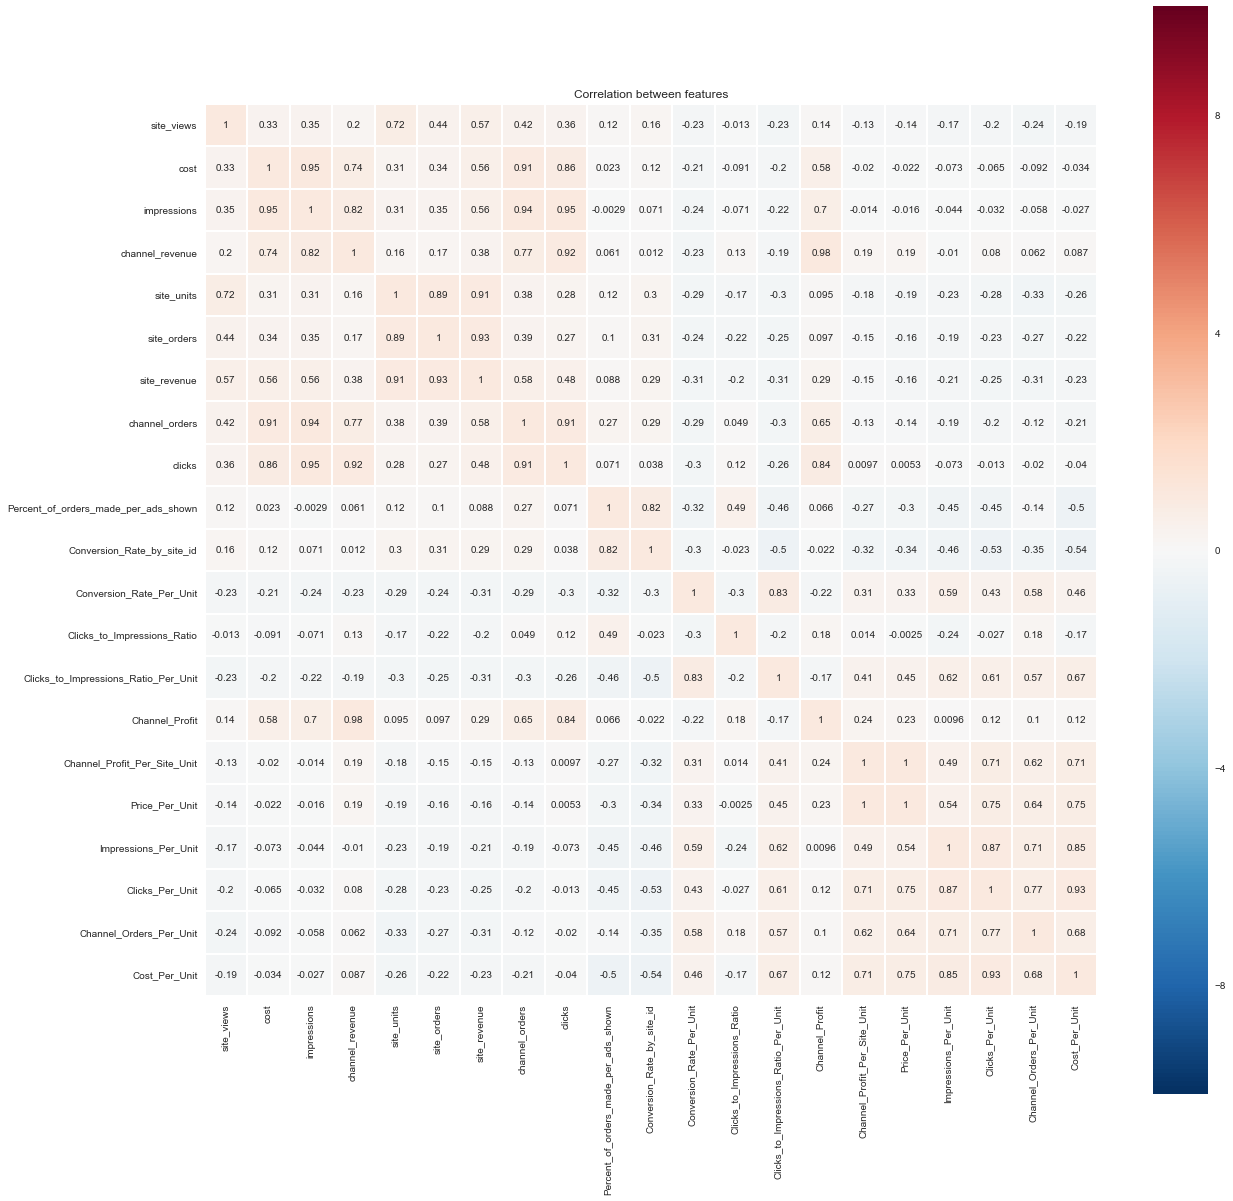

In [20]:
# Correlation heatmap of variables from dataframe. This will give us the strength (positive
# of negative between all the features in the dataset and it will make it easier to pick 
# which feature relationship to explore in more depth). We will use this to help us decide
# which variables to select for extracting interesting information

correlation = Sidecar_Preprocessed.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=10, square=True,annot=True,cmap=None, linewidths=1)

plt.title('Correlation between features')

In [22]:
# Look at the basic statistics of all our features

pd.DataFrame(Sidecar_Preprocessed).describe()

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.076336,0.064762,0.087818,0.118058,0.103740,0.063589,0.108719,0.091532,0.123771,0.328322,...,0.151075,0.353852,0.137827,0.107007,0.098564,0.077872,0.083218,0.122595,0.202524,0.137170
std,0.190271,0.140154,0.145898,0.182973,0.219264,0.159383,0.203572,0.154068,0.172355,0.236973,...,0.240030,0.196188,0.213498,0.163441,0.175763,0.185846,0.166767,0.200060,0.254407,0.232267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004355,0.016118,0.026987,0.020249,0.002424,0.002740,0.010998,0.019968,0.033709,0.175189,...,0.008424,0.233034,0.006993,0.018477,0.032185,0.003141,0.003254,0.006480,0.029312,0.010046
50%,0.019003,0.029439,0.054214,0.053117,0.014167,0.011447,0.030372,0.032987,0.078318,0.276023,...,0.064964,0.326732,0.026981,0.047962,0.038049,0.010167,0.019008,0.033777,0.115619,0.024545
75%,0.063862,0.049378,0.093946,0.153466,0.067944,0.039563,0.097565,0.089100,0.154007,0.399386,...,0.161065,0.453178,0.186694,0.137941,0.079783,0.054876,0.089077,0.128686,0.226068,0.168836
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We are going to cluster the dataset into two groups (K=2) as that seems most appropriate when 
visualizing the dataset with the naked eye. It seems that most of the data points are predominantly in one cluster and a smaller % of the datapoints (websites) that are more volatile and sprase can represent the other cluster. The purpose of this analysis is to better see the relationships between the clusters and what conclusions we can arrive at that are different between the two groups, especially from a pricing/bidding point of view.

# K-Means Clustering


# K=2

In [743]:
# We are going to try K-Means Clustering with K=2

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(Sidecar_Preprocessed)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [744]:
metrics.silhouette_score(Sidecar_Preprocessed, labels, metric='euclidean')
inertia

31.79205263217807

In [745]:
Sidecar_Preprocessed['label'] = labels
Sidecar_Preprocessed.tail()

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit,label
49,0.002420,0.026923,0.012703,0.029761,0.023753,0.015262,0.029464,0.029057,0.014951,0.723685,...,0.232705,0.014886,0.025506,0.033386,0.004806,0.002607,0.003963,0.038297,0.019154,0
50,0.025072,0.041559,0.046285,0.137940,0.003975,0.004790,0.055036,0.026811,0.072067,0.170901,...,0.388749,0.113471,0.136645,0.148130,0.129367,0.064490,0.119616,0.212296,0.172723,0
51,0.073217,0.063994,0.124933,0.077959,0.027627,0.039830,0.048428,0.123386,0.179076,0.309129,...,0.341538,0.015817,0.064155,0.038108,0.011000,0.025963,0.044835,0.146993,0.039704,0
52,0.000678,0.010097,0.013899,0.000996,0.000000,0.000093,0.000000,0.001544,0.012747,0.017490,...,0.132796,1.000000,0.000555,0.000000,0.019586,0.299840,0.326281,0.213355,0.653834,1
53,0.024974,0.137213,0.179311,0.294843,0.002351,0.003602,0.049908,0.038321,0.191222,0.047576,...,0.194474,0.126283,0.271363,0.413439,0.446619,0.403424,0.512641,0.492764,0.917213,1


In [763]:
Sidecar_Preprocessed['label'].value_counts()

0    42
1    12
Name: label, dtype: int64

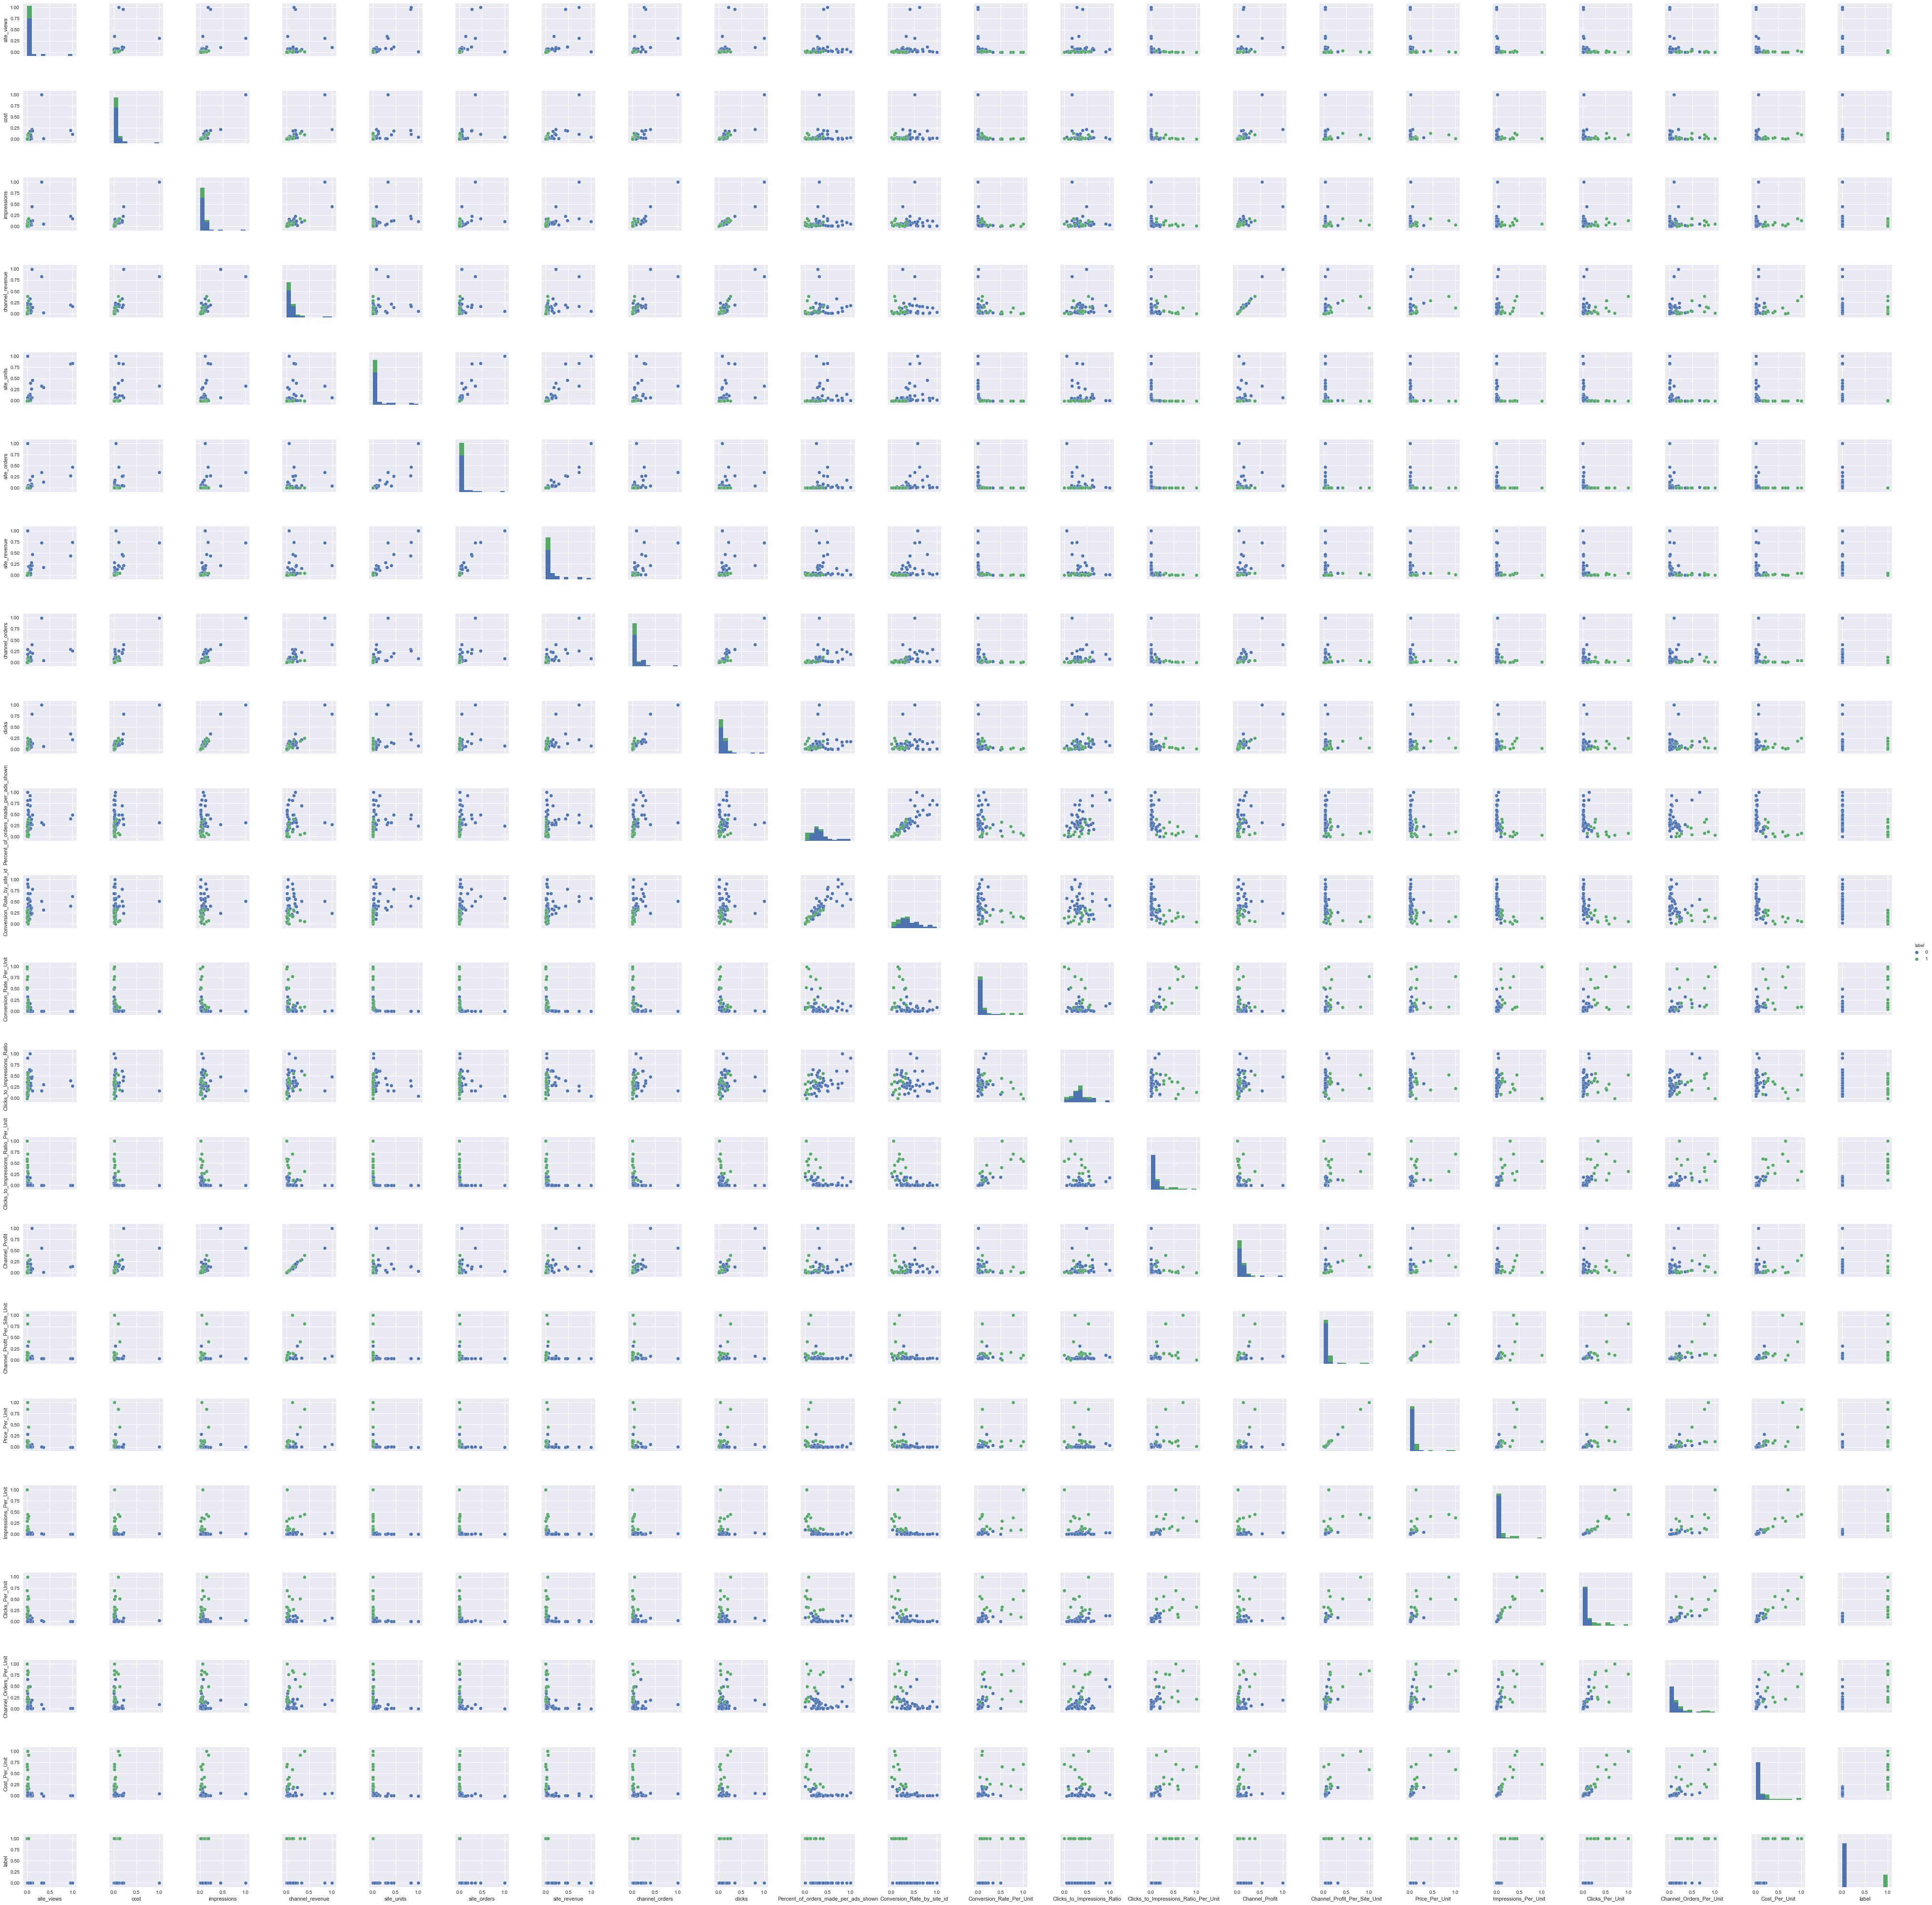

In [746]:
# Represents pairplot with the two clusters separated by color. We will explore a few of those
# relationships in more detail below, particularly those that seem interesting.

cols = Sidecar_Preprocessed.columns[:]
sns.pairplot(Sidecar_Preprocessed, x_vars=cols, y_vars= cols, hue='label')

In [867]:
# Set the two clusters to values of 0 and 1 that we will explore graphically next.

group1 = np.where(['label'] == 0)[0]
group2 = np.where(['label'] == 1)[0]

# Exploratory Data Analysis (EDA)

The Profit Per Unit increases as the Clicks to Impressions Per Unit ratio increases as can be 
seen from the graph below. Most of the click to impression per unit amounts are clustered around somewhat lower values and exhibit a fairly linear relationship in the early stages. It is important to increase the clicks to impressions for each unit to increase profit. Therefore, focus should be given to increase the clicks to impressions ratio for all websites. Also, there are a handful of sites that are somewhat outlierish in that they have significantly higher Clicks to Impressions ratios (group 2) and high Channel Profit Per Site Unit ratios. Those are part of the other cluster (blue) and a different price/bidding strategy can be used for them (particularly higher per unit prices).

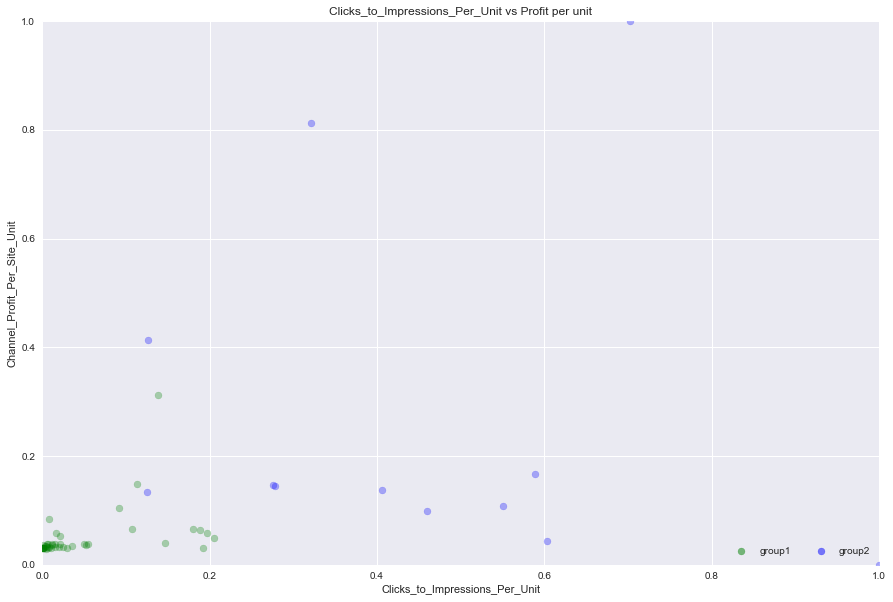

In [772]:
# plot of Click to Impressions Per Unit vs Profit per unit
fig, ax = plt.subplots(figsize=(15,10))
colors = ['g', 'b']
ax.scatter(Sidecar_Preprocessed.Clicks_to_Impressions_Ratio_Per_Unit[group1], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group1],alpha=0.3, color=colors[0])
ax.scatter(Sidecar_Preprocessed.Clicks_to_Impressions_Ratio_Per_Unit[group2], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group2],alpha=0.3, color=colors[1])
ax.set_title("Clicks_to_Impressions_Per_Unit vs Profit per unit")
ax.set_xlabel("Clicks_to_Impressions_Per_Unit")
ax.set_ylabel("Channel_Profit_Per_Site_Unit")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend((g, b),('group1', 'group2'), scatterpoints=1, loc='lower right', ncol=3,fontsize=10)
plt.show()

In [53]:
# These are the datapoints belonging to the 2nd blue cluster that should consider adopting
# a different pricing policy (higher pricing policy because they have significantly higher profits per unit that can
# potentially increase even further). There might be a few differences from the classification
# using K-Means but it appears visually that it makes more sense to adjust the results of
# the algorithm slightly.

Second_Cluster = Sidecar_Preprocessed.ix\
[(Sidecar_Preprocessed['Clicks_to_Impressions_Ratio_Per_Unit'] > 0.1)\
& (Sidecar_Preprocessed['Channel_Profit_Per_Site_Unit'] > 0.1)] 

Second_Cluster

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
0,0.010683,0.104450,0.137361,0.390852,0.001558,0.002995,0.043190,0.041971,0.260815,0.078701,...,0.095841,0.528431,0.321419,0.386275,0.813317,0.846733,0.442549,1.000000,0.773181,1.000000
10,0.015536,0.056293,0.095269,0.146400,0.004664,0.008218,0.010520,0.119455,0.188926,0.398683,...,0.140011,0.561372,0.124717,0.140502,0.134589,0.118140,0.114019,0.269512,0.816087,0.200845
18,0.011888,0.036345,0.089977,0.055512,0.001263,0.000854,0.020987,0.006457,0.124327,0.000000,...,0.037436,0.320412,0.278230,0.049850,0.144182,0.143865,0.345584,0.568123,0.144265,0.417542
19,0.002529,0.019233,0.027999,0.041298,0.001030,0.001854,0.004380,0.029618,0.048252,0.329671,...,0.514208,0.451927,0.405334,0.040650,0.138153,0.126340,0.128057,0.260912,0.766683,0.263268
30,0.005711,0.033832,0.026481,0.234518,0.002913,0.001668,0.041166,0.020494,0.037819,0.235187,...,0.186258,0.335113,0.138179,0.243261,0.312904,0.292815,0.049452,0.083930,0.216882,0.187900
32,0.013640,0.025990,0.037459,0.060044,0.001497,0.002675,0.010930,0.024986,0.059315,0.200118,...,0.260784,0.398337,0.275679,0.058407,0.147272,0.135123,0.125739,0.236173,0.476924,0.260621
36,0.000005,0.009362,0.011759,0.029593,0.000505,0.000614,0.003581,0.009124,0.017877,0.233173,...,0.715085,0.363901,0.588232,0.031573,0.166851,0.151305,0.091881,0.163339,0.399910,0.219292
43,0.000219,0.012857,0.055461,0.010451,0.000046,0.000180,0.000583,0.009545,0.032208,0.034247,...,1.000000,0.000000,0.549974,0.009743,0.108455,0.130555,1.000000,0.694879,1.000000,0.708912
48,0.002137,0.016594,0.031116,0.126850,0.000222,0.000694,0.012212,0.012633,0.035653,0.112982,...,0.776633,0.224256,0.702298,0.133599,1.000000,1.000000,0.369200,0.501747,0.858339,0.592259
50,0.025072,0.041559,0.046285,0.137940,0.003975,0.004790,0.055036,0.026811,0.072067,0.170901,...,0.095760,0.388749,0.113471,0.136645,0.148130,0.129367,0.064490,0.119616,0.212296,0.172723


As can be seen from the plot below, initially the Profit Per Unit to Conversion Rate is fairly constant but than increases for higher conversion rate values. It is important to try to increase the conversion rates for the green clusters so they too can have higher Profits per Unit. The later blue cluster is a much more scattered cluster (blue datapoint websites) and a different pricing scheme can be applied to it.

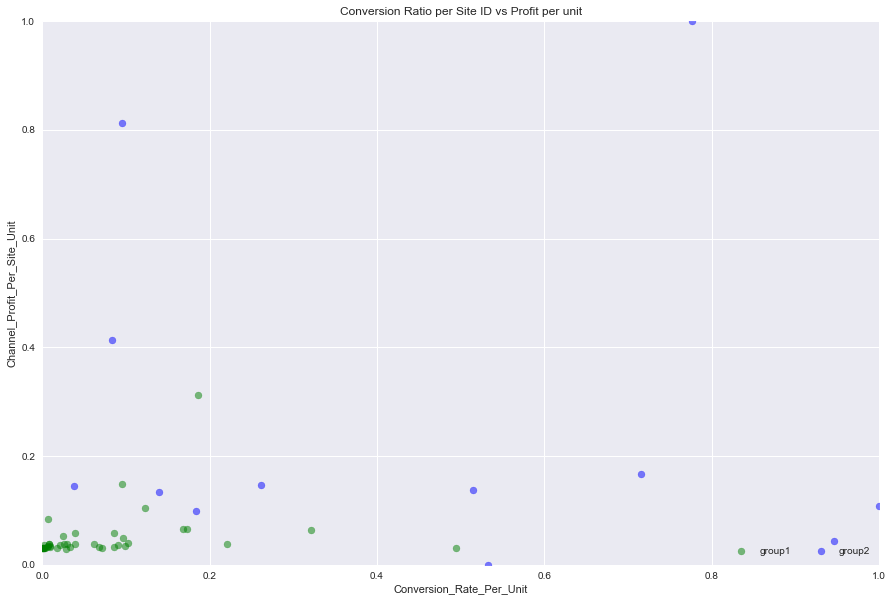

In [767]:
# plot of Conversion Ratio per Unit vs Profit per unit
fig, ax = plt.subplots(figsize=(15,10))
colors = ['g', 'b']
ax.scatter(Sidecar_Preprocessed.Conversion_Rate_Per_Unit[group1], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group1],alpha=0.5, color=colors[0])
ax.scatter(Sidecar_Preprocessed.Conversion_Rate_Per_Unit[group2], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group2],alpha=0.5, color=colors[1])
ax.set_title("Conversion Ratio per Site ID vs Profit per unit")
ax.set_xlabel("Conversion_Rate_Per_Unit")
ax.set_ylabel("Channel_Profit_Per_Site_Unit")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend((g, b),('group1', 'group2'), scatterpoints=1, loc='lower right', ncol=3,fontsize=10)
plt.show()


In [54]:
# These are the datapoints belonging to the 2nd blue cluster that should consider adopting
# a higher pricing policy (they are slightly different from the blue cluster, because it seems
# that the clustering algorithm does not properly cluster some of the datapoints) 

Second_Cluster = Sidecar_Preprocessed.ix\
[(Sidecar_Preprocessed['Conversion_Rate_Per_Unit'] > 0.1)\
& (Sidecar_Preprocessed['Channel_Profit_Per_Site_Unit'] > 0.1)] 

Second_Cluster

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
10,0.015536,0.056293,0.095269,0.146400,0.004664,0.008218,0.010520,0.119455,0.188926,0.398683,...,0.140011,0.561372,0.124717,0.140502,0.134589,0.118140,0.114019,0.269512,0.816087,0.200845
19,0.002529,0.019233,0.027999,0.041298,0.001030,0.001854,0.004380,0.029618,0.048252,0.329671,...,0.514208,0.451927,0.405334,0.040650,0.138153,0.126340,0.128057,0.260912,0.766683,0.263268
30,0.005711,0.033832,0.026481,0.234518,0.002913,0.001668,0.041166,0.020494,0.037819,0.235187,...,0.186258,0.335113,0.138179,0.243261,0.312904,0.292815,0.049452,0.083930,0.216882,0.187900
32,0.013640,0.025990,0.037459,0.060044,0.001497,0.002675,0.010930,0.024986,0.059315,0.200118,...,0.260784,0.398337,0.275679,0.058407,0.147272,0.135123,0.125739,0.236173,0.476924,0.260621
36,0.000005,0.009362,0.011759,0.029593,0.000505,0.000614,0.003581,0.009124,0.017877,0.233173,...,0.715085,0.363901,0.588232,0.031573,0.166851,0.151305,0.091881,0.163339,0.399910,0.219292
43,0.000219,0.012857,0.055461,0.010451,0.000046,0.000180,0.000583,0.009545,0.032208,0.034247,...,1.000000,0.000000,0.549974,0.009743,0.108455,0.130555,1.000000,0.694879,1.000000,0.708912
47,0.009226,0.037318,0.061583,0.188415,0.009285,0.011867,0.016827,0.187535,0.175308,1.000000,...,0.122248,0.904571,0.092239,0.192438,0.104446,0.078516,0.037803,0.129069,0.661469,0.068589
48,0.002137,0.016594,0.031116,0.126850,0.000222,0.000694,0.012212,0.012633,0.035653,0.112982,...,0.776633,0.224256,0.702298,0.133599,1.000000,1.000000,0.369200,0.501747,0.858339,0.592259


The relationship between Price Per Unit and Profit Per Unit is almost exactly positively linear! This is partially because the Cost is very small compared to the Revenues and the 
Profit is largely dictated by the price. We can also see that the plot can be seen through two 
separate clusters. Most of the very dense area is in the lower price per unit and lower profit
per unit area (that mostly represents the green cluster). The other cluster of datapoints (websites) which is quiet sparse belongs to the second cluster.

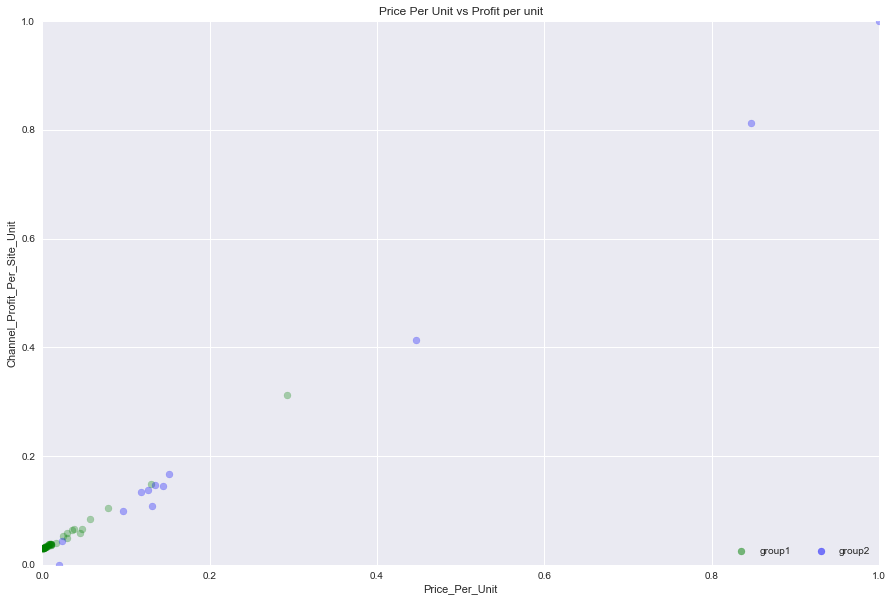

In [774]:

# plot of Price per unit vs Profit per Channel unit
fig, ax = plt.subplots(figsize=(15,10))
colors = ['g', 'b']
ax.scatter(Sidecar_Preprocessed.Price_Per_Unit[group1], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group1],alpha=0.3, color=colors[0])
ax.scatter(Sidecar_Preprocessed.Price_Per_Unit[group2], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group2],alpha=0.3, color=colors[1])
ax.set_title("Price Per Unit vs Profit per unit")
ax.set_xlabel("Price_Per_Unit")
ax.set_ylabel("Channel_Profit_Per_Site_Unit")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend((g, b),('group1', 'group2'), scatterpoints=1, loc='lower right', ncol=3,fontsize=10)
plt.show()


In [55]:
# These are the datapoints belonging to the 2nd blue cluster that should consider adopting
# a higher pricing policy but they should increase their clicks and channel orders to be more
# competitive with the blue cluster in order for the Price increases to result in higher profits
# per unit.

Second_Cluster = Sidecar_Preprocessed.ix\
[(Sidecar_Preprocessed['Price_Per_Unit'] > 0.1)\
& (Sidecar_Preprocessed['Channel_Profit_Per_Site_Unit'] > 0.1)] 

Second_Cluster

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
0,0.010683,0.104450,0.137361,0.390852,0.001558,0.002995,0.043190,0.041971,0.260815,0.078701,...,0.095841,0.528431,0.321419,0.386275,0.813317,0.846733,0.442549,1.000000,0.773181,1.000000
10,0.015536,0.056293,0.095269,0.146400,0.004664,0.008218,0.010520,0.119455,0.188926,0.398683,...,0.140011,0.561372,0.124717,0.140502,0.134589,0.118140,0.114019,0.269512,0.816087,0.200845
18,0.011888,0.036345,0.089977,0.055512,0.001263,0.000854,0.020987,0.006457,0.124327,0.000000,...,0.037436,0.320412,0.278230,0.049850,0.144182,0.143865,0.345584,0.568123,0.144265,0.417542
19,0.002529,0.019233,0.027999,0.041298,0.001030,0.001854,0.004380,0.029618,0.048252,0.329671,...,0.514208,0.451927,0.405334,0.040650,0.138153,0.126340,0.128057,0.260912,0.766683,0.263268
30,0.005711,0.033832,0.026481,0.234518,0.002913,0.001668,0.041166,0.020494,0.037819,0.235187,...,0.186258,0.335113,0.138179,0.243261,0.312904,0.292815,0.049452,0.083930,0.216882,0.187900
32,0.013640,0.025990,0.037459,0.060044,0.001497,0.002675,0.010930,0.024986,0.059315,0.200118,...,0.260784,0.398337,0.275679,0.058407,0.147272,0.135123,0.125739,0.236173,0.476924,0.260621
36,0.000005,0.009362,0.011759,0.029593,0.000505,0.000614,0.003581,0.009124,0.017877,0.233173,...,0.715085,0.363901,0.588232,0.031573,0.166851,0.151305,0.091881,0.163339,0.399910,0.219292
43,0.000219,0.012857,0.055461,0.010451,0.000046,0.000180,0.000583,0.009545,0.032208,0.034247,...,1.000000,0.000000,0.549974,0.009743,0.108455,0.130555,1.000000,0.694879,1.000000,0.708912
48,0.002137,0.016594,0.031116,0.126850,0.000222,0.000694,0.012212,0.012633,0.035653,0.112982,...,0.776633,0.224256,0.702298,0.133599,1.000000,1.000000,0.369200,0.501747,0.858339,0.592259
50,0.025072,0.041559,0.046285,0.137940,0.003975,0.004790,0.055036,0.026811,0.072067,0.170901,...,0.095760,0.388749,0.113471,0.136645,0.148130,0.129367,0.064490,0.119616,0.212296,0.172723


Most of the sites are dense and clustered together in the low cost per unit and channel per unit ratios (green color). Slightly past this, the sites are much more variable and scarce, but on average having much higher average cost per unit. Those are generally part of the blue cluster. Those websites can have more expenses allocated to them because they bring in significantly greater Channel Profit Per Unit. Hence, it is to be expected that for the products that have higher profits to incur higher costs (and have higher revenues as can be 
observed from the other graphs).



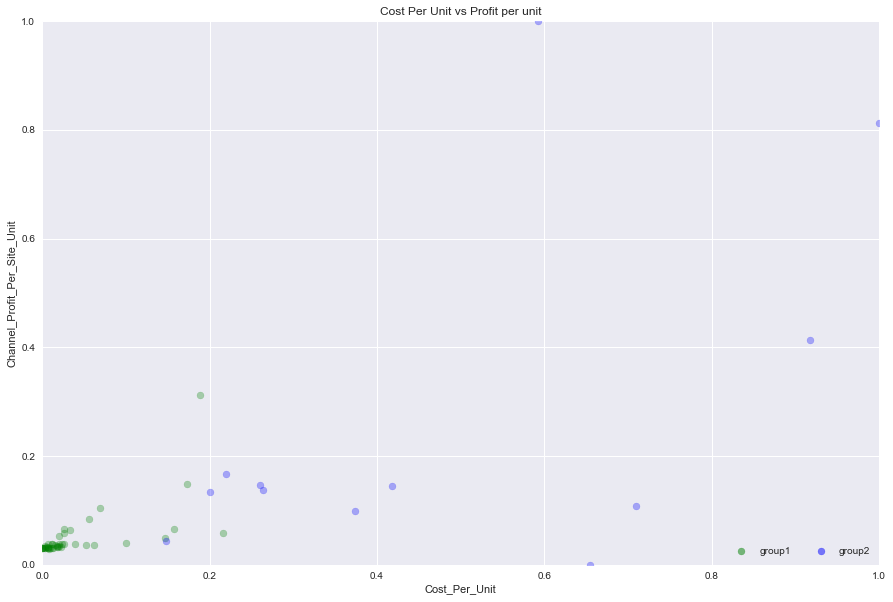

In [787]:
# plot of Cost per unit vs Profit per Channel unit
fig, ax = plt.subplots(figsize=(15,10))
colors = ['g', 'b']
ax.scatter(Sidecar_Preprocessed.Cost_Per_Unit[group1], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group1],alpha=0.3, color=colors[0])
ax.scatter(Sidecar_Preprocessed.Cost_Per_Unit[group2], Sidecar_Preprocessed.Channel_Profit_Per_Site_Unit[group2],alpha=0.3, color=colors[1])
ax.set_title("Cost Per Unit vs Profit per unit")
ax.set_xlabel("Cost_Per_Unit")
ax.set_ylabel("Channel_Profit_Per_Site_Unit")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend((g, b),('group1', 'group2'), scatterpoints=1, loc='lower right', ncol=3,fontsize=10)
plt.show()


In [56]:
# These are the datapoints belonging to the 2nd blue cluster that should consider adopting
# a higher pricing policy (they are slightly different from the blue cluster, because it seems
# that the clustering algorithm does not properly cluster some of the datapoints, particularly,
# including some green datapoints in the sparse blue cluster).

Second_Cluster = Sidecar_Preprocessed.ix\
[(Sidecar_Preprocessed['Cost_Per_Unit'] > 0.1)\
& (Sidecar_Preprocessed['Channel_Profit_Per_Site_Unit'] > 0.1)] 

Second_Cluster

,site_views,cost,impressions,channel_revenue,site_units,site_orders,site_revenue,channel_orders,clicks,Percent_of_orders_made_per_ads_shown,...,Conversion_Rate_Per_Unit,Clicks_to_Impressions_Ratio,Clicks_to_Impressions_Ratio_Per_Unit,Channel_Profit,Channel_Profit_Per_Site_Unit,Price_Per_Unit,Impressions_Per_Unit,Clicks_Per_Unit,Channel_Orders_Per_Unit,Cost_Per_Unit
0,0.010683,0.104450,0.137361,0.390852,0.001558,0.002995,0.043190,0.041971,0.260815,0.078701,...,0.095841,0.528431,0.321419,0.386275,0.813317,0.846733,0.442549,1.000000,0.773181,1.000000
10,0.015536,0.056293,0.095269,0.146400,0.004664,0.008218,0.010520,0.119455,0.188926,0.398683,...,0.140011,0.561372,0.124717,0.140502,0.134589,0.118140,0.114019,0.269512,0.816087,0.200845
18,0.011888,0.036345,0.089977,0.055512,0.001263,0.000854,0.020987,0.006457,0.124327,0.000000,...,0.037436,0.320412,0.278230,0.049850,0.144182,0.143865,0.345584,0.568123,0.144265,0.417542
19,0.002529,0.019233,0.027999,0.041298,0.001030,0.001854,0.004380,0.029618,0.048252,0.329671,...,0.514208,0.451927,0.405334,0.040650,0.138153,0.126340,0.128057,0.260912,0.766683,0.263268
30,0.005711,0.033832,0.026481,0.234518,0.002913,0.001668,0.041166,0.020494,0.037819,0.235187,...,0.186258,0.335113,0.138179,0.243261,0.312904,0.292815,0.049452,0.083930,0.216882,0.187900
32,0.013640,0.025990,0.037459,0.060044,0.001497,0.002675,0.010930,0.024986,0.059315,0.200118,...,0.260784,0.398337,0.275679,0.058407,0.147272,0.135123,0.125739,0.236173,0.476924,0.260621
36,0.000005,0.009362,0.011759,0.029593,0.000505,0.000614,0.003581,0.009124,0.017877,0.233173,...,0.715085,0.363901,0.588232,0.031573,0.166851,0.151305,0.091881,0.163339,0.399910,0.219292
43,0.000219,0.012857,0.055461,0.010451,0.000046,0.000180,0.000583,0.009545,0.032208,0.034247,...,1.000000,0.000000,0.549974,0.009743,0.108455,0.130555,1.000000,0.694879,1.000000,0.708912
48,0.002137,0.016594,0.031116,0.126850,0.000222,0.000694,0.012212,0.012633,0.035653,0.112982,...,0.776633,0.224256,0.702298,0.133599,1.000000,1.000000,0.369200,0.501747,0.858339,0.592259
50,0.025072,0.041559,0.046285,0.137940,0.003975,0.004790,0.055036,0.026811,0.072067,0.170901,...,0.095760,0.388749,0.113471,0.136645,0.148130,0.129367,0.064490,0.119616,0.212296,0.172723


# Conclusion/Insights

Firstly, a few comments about the assumptions. The two clusters are significantly imbalanced 
in terms of the distribution of the number of websites between the two of them (green vs blue), so we assume that the data, and especially the blue cluster of websites representing the much smaller number of data points is not simply an outlier to the general trend in the data that is predominantly present in the green cluster and has a much more linear relationship. So we assume that the blue cluster of more variable datapoints (websites) is
highly representative of the behavior of this dataset.

It is also important to note that the K-Means Clustering Algorithm (with K=2) was used to cluster the datapoints. K=2 was chosen because most of the plots seem to be clustered into no more than 2 groups, and the majority probably belong to only one cluster as can be visualized by looking at the graphs. With more time, more detailed analysis could be done from a clustering point of view, such as the K-Means algorithm being reiterated multiple times giving 
a more accurate picture of the results. It seems that some of the clustering done by the 
algorithm is not entirely accurate so a modification was needed to show the more accurate 
result when viewing the plot.

The important insights are that higher clicks to impression ratios and higher conversion
ratios (# of orders divided by number of clicks) lead to higher profit per unit. 

The price per unit is positively correlated with the profit per unit. A higher cost per unit
is associated with a higher profit per unit.

Another important discovery is the grouping (clustering) of the websites (datapoints). Most of these relationships discussed above illustrate similar relationships in this regard. Most of the datapoints are highly dense and clustered together on the lower side of both the x and y-axis in all of the above plots. Those represent the larger main cluster (green cluster). The other blue cluster is the smaller cluster in terms of the number of websites and it exhibits rather volatile and sparse behavior (unlike the rather linear steady trend exihibited by the green cluster) and generally shows better significantly better results in terms of the profits per unit that can be extracted from the blue colored websites. 

Therefore, the proposal would be to separate the the pricing/bidding strategy between these websites into two. That would be to have a similar price for all datapoints that are represented by (0-0.1) on the x-axis normalized scale and a significantly higher price/bid for those that are above it (predominantly shown in the blue cluster).